In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [4]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
SC = StandardScaler()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(SC.fit_transform(X),Y,
                                                                                test_size= 0.33, stratify=Y)

In [9]:
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
GNB = GaussianNB()

In [10]:
LDA.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [11]:
QDA.get_params()

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [12]:
GNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [13]:
LDA = LinearDiscriminantAnalysis()
model_fit2(LDA, X_train, X_test, Y_train, Y_test)

LinearDiscriminantAnalysis

Train score is :0.666
Test score is :0.597


In [14]:
LDA = LinearDiscriminantAnalysis()
model_fit2(LDA, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

LinearDiscriminantAnalysis

Train score is :0.658
Test score is :0.643


In [15]:
QDA = QuadraticDiscriminantAnalysis()
model_fit2(QDA, X_train, X_test, Y_train, Y_test)

QuadraticDiscriminantAnalysis

Train score is :0.739
Test score is :0.639


C:\Users\behroozk\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [16]:
QDA = QuadraticDiscriminantAnalysis()
model_fit2(QDA, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

QuadraticDiscriminantAnalysis

Train score is :0.739
Test score is :0.63


C:\Users\behroozk\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [17]:
GNB = GaussianNB(var_smoothing = 1e-8)
model_fit2(GNB, X_train, X_test, Y_train, Y_test)

GaussianNB

Train score is :0.649
Test score is :0.626


In [18]:
GNB = GaussianNB(var_smoothing = 1e-8)
model_fit2(GNB, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

GaussianNB

Train score is :0.637
Test score is :0.647


GaussianNB


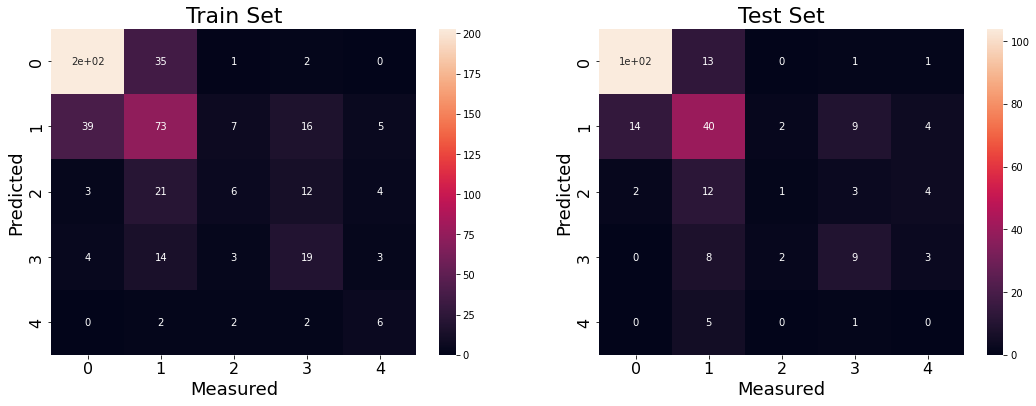

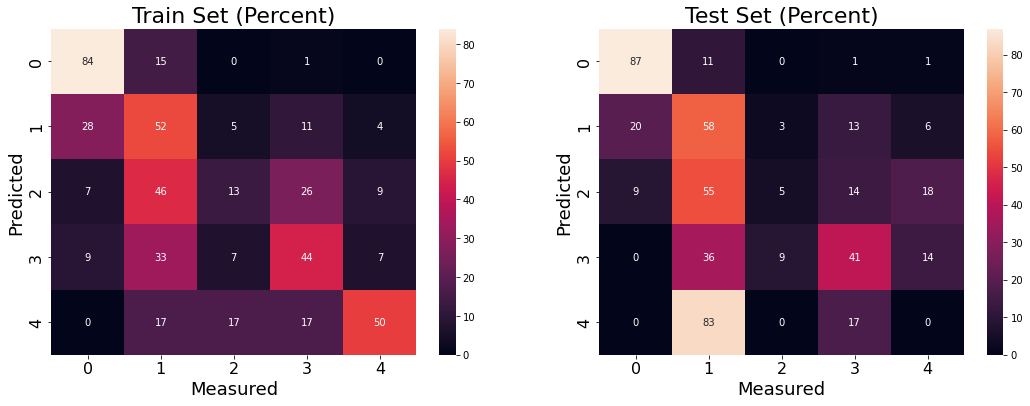

In [19]:
plot_confusion_matrix(GNB, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

Precision score for training set is :0.82
Precision score for testing  set is :0.87
Recall score for training set is :0.84
Recall score for testing  set is :0.87
F1 score for training set is :0.83
F1 score for testing  set is :0.87
AUC for training set is :0.89
AUC for testing  set is :0.86


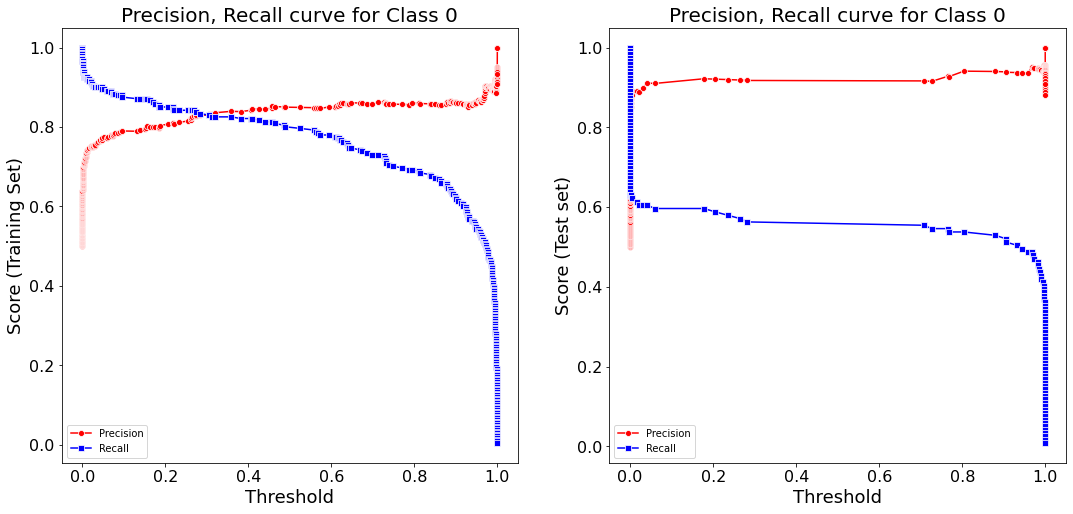

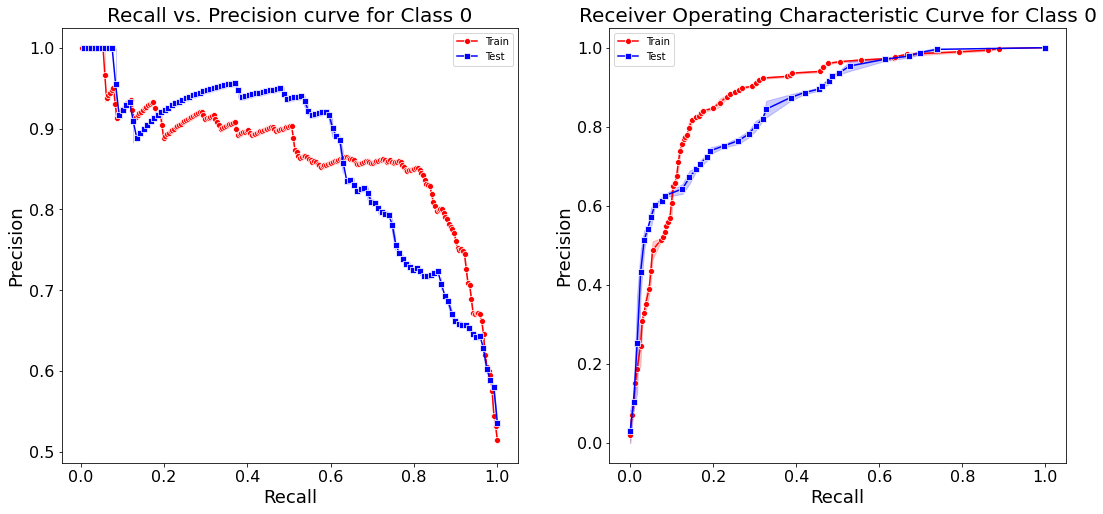

In [20]:
get_precision_recall(GNB, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 0)

Precision score for training set is :0.33
Precision score for testing  set is :0.0
Recall score for training set is :0.5
Recall score for testing  set is :0.0
F1 score for training set is :0.4
F1 score for testing  set is :0.0
AUC for training set is :0.6
AUC for testing  set is :0.42


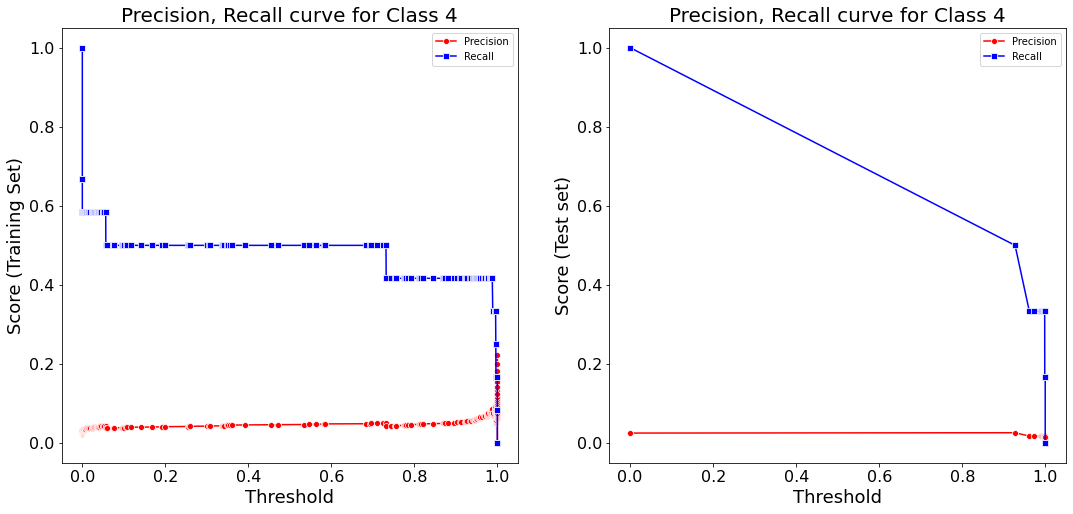

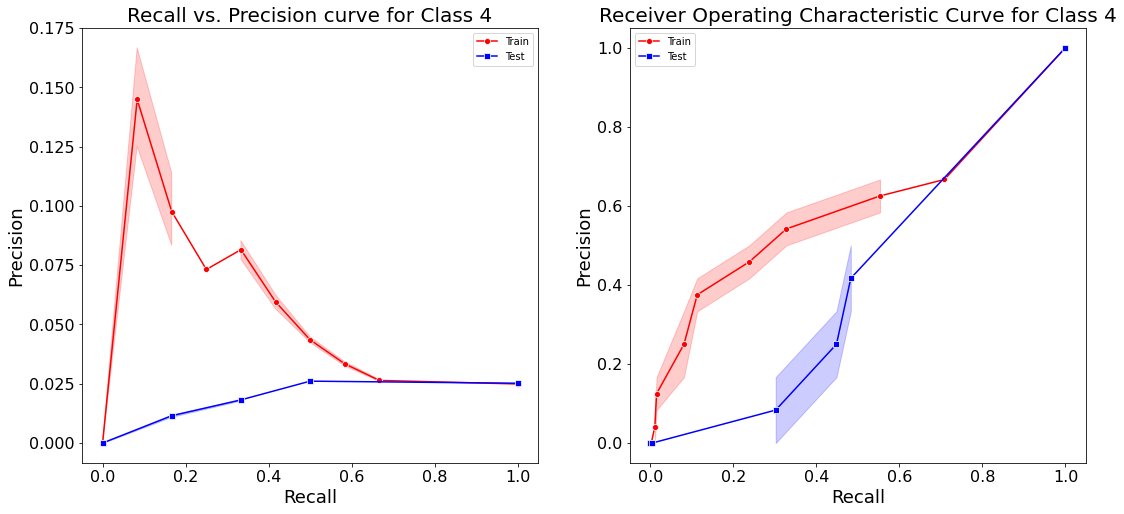

In [21]:
get_precision_recall(GNB, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 4)